<a href="https://colab.research.google.com/github/izzettinalhalil/ML/blob/main/Copy_of_final_of_torsion_and_period_Keras_sequential_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import pandas as pd
import tensorflow as tf
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns

In [2]:

# load data and arrange into Pandas dataframe
df = read_csv("data24.csv", delim_whitespace=False, header=None)

feature_names = ['CRM', 'A_target', 'A_orthog', 'ht/h1', 'a/b', 'min/max', '#_storys', 
                 '#_spans', 'Aw/Ap', 'H', 'beam_sec','col_sec', 'SDs','SD1', 'torsion', 'period', 'MPMR']


df.columns = feature_names
print(df.head())

print(df.describe())
print(df.shape)



     CRM  A_target  A_orthog  ht/h1    a/b  min/max  #_storys  #_spans  Aw/Ap  \
0  2.500      36.0      45.0    1.0  0.750      1.0         4        4    0.0   
1  2.500      36.0      48.0    1.0  0.750      1.0         4        3    0.0   
2  0.833      36.0      45.0    1.0  0.750      1.0         4        4    0.0   
3  1.250      36.0      48.0    1.0  1.333      1.0         4        3    0.0   
4  5.000      24.0      45.0    1.0  0.750      1.0         4        4    0.0   

      H  beam_sec  col_sec    SDs    SD1   torsion    period     MPMR  
0  12.0    0.1375    0.175  0.864  0.214  1.360014  0.288490  0.70515  
1  12.0    0.1375    0.175  0.864  0.214  1.410841  0.300015  0.71192  
2  12.0    0.1375    0.175  0.864  0.214  1.111207  0.270196  0.86111  
3  12.0    0.1375    0.175  0.864  0.214  1.207425  0.282446  0.85320  
4  12.0    0.1375    0.175  0.864  0.214  1.386205  0.353360  0.72332  
              CRM    A_target    A_orthog       ht/h1         a/b     min/max  \


In [3]:
#Split into features and target 
x = df[['CRM', 'A_target', 'A_orthog', 'ht/h1', 'a/b', 'min/max', '#_storys', 
                 '#_spans', 'Aw/Ap', 'H', 'beam_sec','col_sec', 'SDs','SD1']]

y = df[['torsion','period', 'MPMR']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20)


In [4]:
#Scale data, otherwise model will fail.
#Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(x)



In [5]:
X_train.shape[1]

14

In [6]:
# define the model
#Experiment with deeper and wider networks
model = Sequential()
model.add(Dense(100, input_dim=14, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(120, activation='tanh'))
model.add(Dense(120, activation='sigmoid'))
model.add(Dense(120, activation='tanh'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
#Output layer
model.add(Dense(3, activation='linear'))
optimizer1 ='adam'
optimizer2 ='SGD'
optimizer3 ='adamax'
optimizer4 ='Adadelta' 
optimizer5 = 'Adagrad' 
optimizer6 ='Ftrl'
optimizer7 ='Nadam' 
optimizer8 ='RMSprop'
loss1 = 'mean_squared_error'
loss2 = 'MeanAbsoluteError' 
loss3 = 'MeanAbsolutePercentageError' 
loss4 = 'MeanSquaredLogarithmicError' 
loss6 = tf.keras.losses.Poisson()
metrics1 = 'mae'
metrics2 = 'mse'
metrics3 = 'rmse'
model.compile(loss=loss1, optimizer=optimizer1, metrics=[metrics1])
model.summary()

history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs =300)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1500      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 120)               12120     
                                                                 
 dense_3 (Dense)             (None, 120)               14520     
                                                                 
 dense_4 (Dense)             (None, 120)               14520     
                                                                 
 dense_5 (Dense)             (None, 100)               12100     
                                                                 
 dense_6 (Dense)             (None, 100)               1

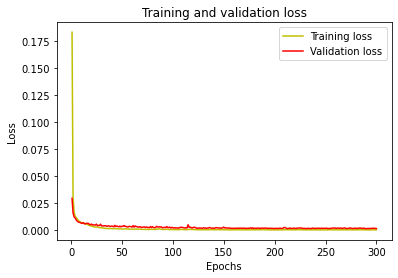

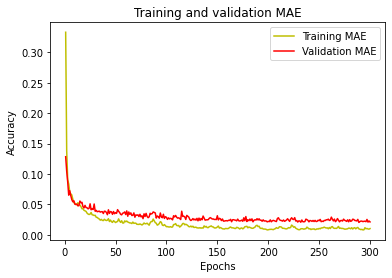

In [7]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [178]:
############################################
#Predict on test data
predictions = model.predict(X_test_scaled)
predictions2 = model.predict(X_train_scaled)
predictions3 = model.predict(X_scaled)

#print("Predicted values are: ", predictions)
#print("Real values are: ", y_test)
mse_nn = mean_squared_error(y_test, predictions)   #for test
mae_nn = mean_absolute_error(y_test, predictions)
mape = tf.keras.losses.MeanAbsolutePercentageError()
mape_test = mape(y_test, predictions).numpy()
msle = tf.keras.losses.MeanSquaredLogarithmicError()
msle_test = msle(y_test, predictions).numpy()

mse_nn2 = mean_squared_error(y_train, predictions2)    #for train
mae_nn2 = mean_absolute_error(y_train, predictions2)
mape_train = mape(y_train, predictions2).numpy()
msle_train = msle(y_train, predictions2).numpy()

r2_test = r2_score(y_test, predictions)      #r2 for test
r2_train = r2_score(y_train, predictions2)      #r2 for train
r2_model = r2_score(y, predictions3)      #r2 for train

print('Mean squared error for test: ', mse_nn)
print('Mean absolute error for test: ', mae_nn)
print('MeanAbsolutePercentageError for test', mape_test)    #loss = 100 * abs((y_true - y_pred) / y_true)
print('MeanSquaredLogarithmicError for test', msle_test)     #loss = square(log(y_true + 1.) - log(y_pred + 1.))
print("  ")
print('Mean squared error of train from NN: ', mse_nn2)
print('Mean absolute error of train from NN: ', mae_nn2)
print('MeanAbsolutePercentageError for train', mape_train)   
print('MeanSquaredLogarithmicError for test', msle_train)
print("  ")

print('R^2 of NN for test: ', r2_test)
print('R^2 of NN for train: ', r2_train)
print('R^2 of NN for model: ', r2_model)

Mean squared error for test:  0.0007491113503268358
Mean absolute error for test:  0.013522288824373882
MeanAbsolutePercentageError for test 2.187499761581421
MeanSquaredLogarithmicError for test 0.0002642514300532639
  
Mean squared error of train from NN:  0.0001970747513847249
Mean absolute error of train from NN:  0.005638974671765059
MeanAbsolutePercentageError for train 1.2180854082107544
MeanSquaredLogarithmicError for test 9.183434303849936e-05
  
R^2 of NN for test:  0.9635983205977294
R^2 of NN for train:  0.9911895800734358
R^2 of NN for model:  0.9854925265387647


In [9]:
#BYS determination
sd = np.array(df['SDs'])
print(sd.shape)
type(sd)
print(sd)
DTS = []
for i in sd:
  if i < 0.33:
    d = 4
    DTS.append(d)
  elif i>=0.33 and i<0.5:
    d=3
    DTS.append(d)
  elif i>=0.5 and i<0.75:
    d=2
    DTS.append(d)
  else:
    d=1
    DTS.append(d)
print(DTS)

(430,)
[0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864
 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864
 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864
 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864
 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864
 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864
 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864
 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864
 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864
 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864
 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864
 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864
 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0.864
 0.864 0.864 0.864 0.864 0.864 0.864 0.864 0

In [179]:
len(predictions)

86

In [185]:
#pushover applicability
from numpy import array
def pushover(predictions):
 app=[]
 predictions = np.array(predictions)
 torsion = predictions[:,0]
 mpmr = predictions[:,2]
 for i in range(0,len(predictions)):
     if torsion[i] >=1.4 or mpmr[i]<0.7:
       app.append('not app')
     else:
       app.append('app')
 return app



In [194]:
b1= pushover(y)
b2= pushover(predictions3)

print('the true results: ' ,b1)
print('the predicted results: ' ,b2)
va = b1==b2
if va ==False:
  print('not all the result is predict correctly  let''s calculate how many cases is predicted wrong')
acc=0
wrong = []
for i in range(0,len(b1)-1):
  if b1[i] == b2[i]:
    acc=acc+1
  else:
    wrong.append(i)

print('Number of the total examples is: ',len(b1))  
print('Number of the correct predicted examples is: ',  acc)
print('Number of the non-correct predicted examples is: ',  len(b1)-acc)

print(wrong)



the true results:  ['app', 'not app', 'app', 'app', 'app', 'not app', 'not app', 'not app', 'app', 'app', 'app', 'app', 'app', 'app', 'app', 'app', 'app', 'not app', 'app', 'app', 'app', 'app', 'app', 'app', 'app', 'app', 'app', 'app', 'app', 'app', 'app', 'app', 'app', 'app', 'not app', 'not app', 'not app', 'not app', 'app', 'app', 'not app', 'app', 'not app', 'app', 'app', 'app', 'app', 'app', 'app', 'app', 'app', 'app', 'app', 'app', 'app', 'app', 'app', 'app', 'app', 'app', 'not app', 'not app', 'app', 'app', 'not app', 'not app', 'not app', 'not app', 'not app', 'not app', 'not app', 'not app', 'not app', 'app', 'app', 'not app', 'app', 'app', 'app', 'not app', 'app', 'app', 'app', 'app', 'not app', 'not app', 'not app', 'not app', 'not app', 'not app', 'not app', 'not app', 'not app', 'not app', 'not app', 'app', 'app', 'app', 'not app', 'not app', 'app', 'app', 'app', 'app', 'app', 'app', 'not app', 'app', 'app', 'app', 'app', 'app', 'app', 'app', 'app', 'app', 'not app', 'app'

In [151]:
c = b1.count('app')
ind = b1.index('app')
ind

1

0.795
0.937


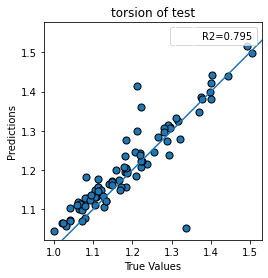

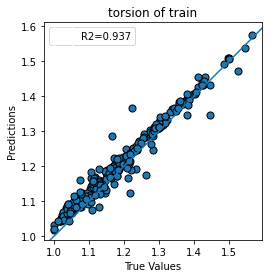

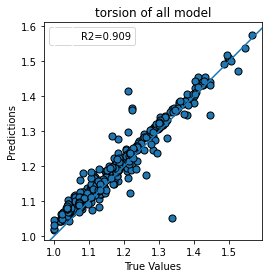

In [12]:
import matplotlib.lines
r2_tor_test = str(round(r2_score(np.array(y_test).T[0], np.array(predictions).T[0]), 3))
r2_tor_train = str(round(r2_score(np.array(y_train).T[0], np.array(predictions2).T[0]),3))
r2_tor_model = str(round(r2_score(np.array(y).T[0], np.array(predictions3).T[0]),3))


print(r2_tor_test)
print(r2_tor_train)
def plot_diff(y_true, y_pred,r2, title=''):
    plt.scatter(y_true, y_pred, label=r2, marker='o', alpha=1,s=50, facecolor='C0', edgecolor='k')
    plt.title(title)
    leg=[matplotlib.lines.Line2D([0],[0],marker='x',color='w',label='R2='+r2, markerfacecolor='g', markersize=20)]
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.legend(handles=leg)
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()


plot_diff(np.array(y_test).T[0], np.array(predictions).T[0], r2_tor_test, title='torsion of test')
plot_diff(np.array(y_train).T[0], np.array(predictions2).T[0], r2_tor_train, title='torsion of train')
plot_diff(np.array(y).T[0], np.array(predictions3).T[0], r2_tor_model, title='torsion of all model')

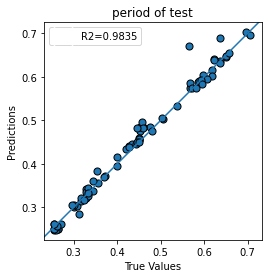

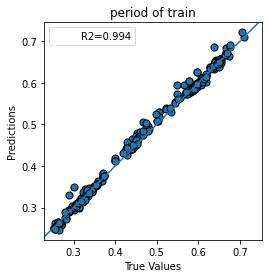

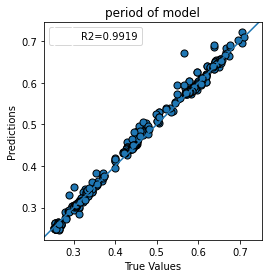

In [13]:
#plotting the predicted and tested values as point without line

#plt.scatter(np.array(y_test).T[0], np.array(predictions).T[0])       #test torsion  vs predicted torsion
#plt.scatter(np.array(y_test).T[1], np.array(predictions).T[1])       #test period  vs predicted period
#plt.scatter(np.array(y_train).T[0], np.array(predictions2).T[0])      #train torsion  vs predicted torsion
#plt.scatter(np.array(y_train).T[1], np.array(predictions2).T[1])      #train period  vs predicted period
r2_per_test = str(round(r2_score(np.array(y_test).T[1], np.array(predictions).T[1]), 4))
r2_per_train = str(round(r2_score(np.array(y_train).T[1], np.array(predictions2).T[1]),4))
r2_per_model = str(round(r2_score(np.array(y).T[1], np.array(predictions3).T[1]),4))


plot_diff(np.array(y_test).T[1], np.array(predictions).T[1], r2_per_test, title='period of test')
plot_diff(np.array(y_train).T[1], np.array(predictions2).T[1], r2_per_train, title='period of train')
plot_diff(np.array(y).T[1], np.array(predictions3).T[1], r2_per_model, title='period of model')

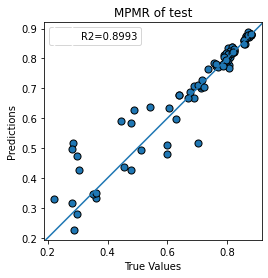

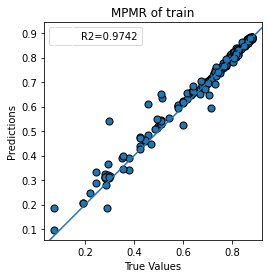

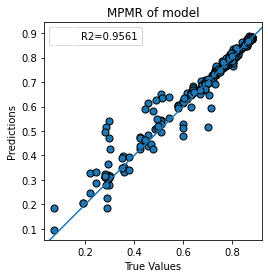

In [14]:
r2_mpmr_test = str(round(r2_score(np.array(y_test).T[2], np.array(predictions).T[2]), 4))
r2_mpmr_train = str(round(r2_score(np.array(y_train).T[2], np.array(predictions2).T[2]),4))
r2_mpmr_model = str(round(r2_score(np.array(y).T[2], np.array(predictions3).T[2]),4))


plot_diff(np.array(y_test).T[2], np.array(predictions).T[2], r2_mpmr_test, title='MPMR of test')
plot_diff(np.array(y_train).T[2], np.array(predictions2).T[2], r2_mpmr_train, title='MPMR of train')
plot_diff(np.array(y).T[2], np.array(predictions3).T[2], r2_mpmr_model, title='MPMR of model')

In [15]:
#Comparison with other models..
#Neural network - from the current code
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)

3/3 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0255
Mean squared error from neural net:  0.002196492161601782
Mean absolute error from neural net:  0.025526011362671852


In [16]:
######################################################################
#Linear regression
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
### Linear regression
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)    #predict the test data
y_pred_lr2 = lr_model.predict(X_train_scaled)    #predict the training data
y_pred_lr3 = lr_model.predict(X_scaled)    #predict the model data



mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

#r2 for all data (test + train + all model)
r2_lr = r2_score(y_test, y_pred_lr)      #r2 of test
r2_lr2 = r2_score(y_train, y_pred_lr2)      #r2 of train
r2_lr3 = r2_score(y, y_pred_lr3)      #r2 of model

#r2 for torsion (test + train + all model)
r2_tor_test_lr = str(round(r2_score(np.array(y_test).T[0], np.array(y_pred_lr).T[0]), 3))
r2_tor_train_lr = str(round(r2_score(np.array(y_train).T[0], np.array(y_pred_lr2).T[0]),3))
r2_tor_model_lr = str(round(r2_score(np.array(y).T[0], np.array(y_pred_lr3).T[0]),3))

#r2 for period (test + train + all model)
r2_per_test_lr = str(round(r2_score(np.array(y_test).T[1], np.array(y_pred_lr).T[1]), 3))
r2_per_train_lr = str(round(r2_score(np.array(y_train).T[1], np.array(y_pred_lr2).T[1]),3))
r2_per_model_lr = str(round(r2_score(np.array(y).T[1], np.array(y_pred_lr3).T[1]),3))

#r2 for MPMR (test + train + all model)
r2_mpmr_test_lr = str(round(r2_score(np.array(y_test).T[2], np.array(y_pred_lr).T[2]), 3))
r2_mpmr_train_lr = str(round(r2_score(np.array(y_train).T[2], np.array(y_pred_lr2).T[2]),3))
r2_mpmr_model_lr = str(round(r2_score(np.array(y).T[2], np.array(y_pred_lr3).T[2]),3))


lr_model.score(X_test_scaled,y_test)   #r2
print(lr_model.intercept_)
coff = list(zip(['CRM', 'A_target', 'A_orthog', 'ht/h1', 'a/b', 'min/max', '#_storys', '#_spans', 'Aw/Ap'], lr_model.coef_))
print(coff)
print('Mean squared error from linear regression: ', mse_lr)
print('Mean absolute error from linear regression: ', mae_lr)
print('')
print('R^2 of LR for test: ', r2_lr)
print('R^2 of LR for train: ', r2_lr2)
print('R^2 of LR for model: ', r2_lr3)
print('')
print('R^2 of LR for  trorsion test: ', r2_tor_test_lr)
print('R^2 of LR for trorsion train: ', r2_tor_train_lr)
print('R^2 of LR for trorsion model: ', r2_tor_model_lr)
print('')
print('R^2 of LR for period test: ', r2_per_test_lr)
print('R^2 of LR for period train: ', r2_per_train_lr)
print('R^2 of LR for period model: ', r2_per_model_lr)
print('')
print('R^2 of LR for MPMR test: ', r2_mpmr_test_lr)
print('R^2 of LR for MPMR train: ', r2_mpmr_train_lr)
print('R^2 of LR for MPMR model: ', r2_mpmr_model_lr)
print('')




[1.17412657 0.4523606  0.73146224]
[('CRM', array([ 0.06801908, -0.10268966,  0.05732385,  0.14765044, -0.00391059,
       -0.03453646, -1.66167231, -0.03418189, -0.00329492,  1.76014872,
       -0.0098079 ,  0.00522044,  0.00955563, -0.00538038])), ('A_target', array([ 1.08027300e-02, -7.93596817e-02, -7.68804895e-02,  5.19201476e-01,
        3.77882731e-03, -5.55164779e-02, -8.39806118e+00, -6.23695300e-03,
       -5.80620402e-02,  8.94826367e+00, -1.56647565e-03, -1.09756649e-02,
        1.36742525e-03, -1.87839284e-03])), ('A_orthog', array([-2.91768979e-02,  2.69689765e-01,  6.04552714e-01, -4.05733800e+00,
       -1.54458539e-02,  4.67597853e-01,  6.80668460e+01,  8.68880771e-03,
        3.24824951e-01, -7.09393436e+01,  1.25961373e-02,  9.62757469e-03,
       -1.42122578e-02,  1.46775171e-02]))]
Mean squared error from linear regression:  0.007938836859518454
Mean absolute error from linear regression:  0.05665802995913538

R^2 of LR for test:  0.659814569697675
R^2 of LR for tr

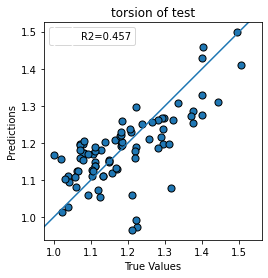

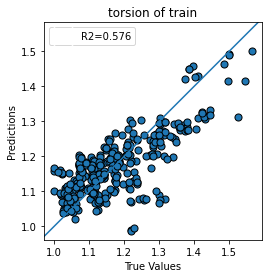

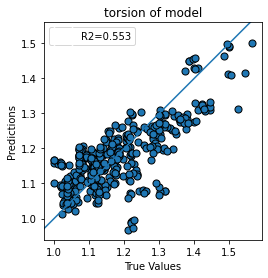

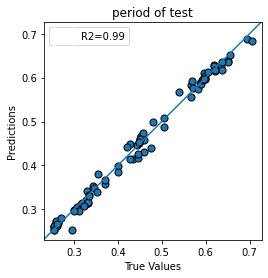

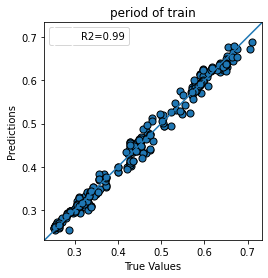

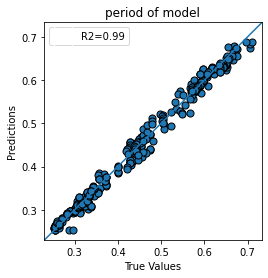

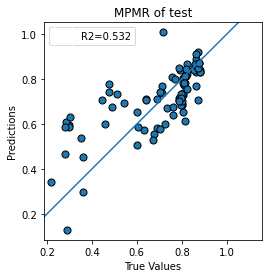

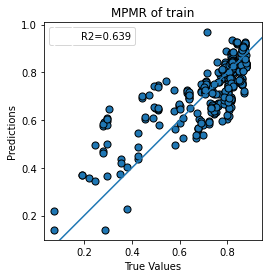

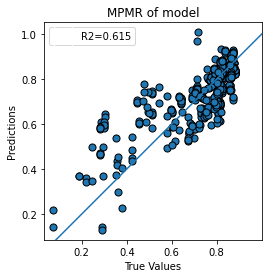

In [17]:

plot_diff(np.array(y_test).T[0], np.array(y_pred_lr).T[0], r2_tor_test_lr, title='torsion of test')
plot_diff(np.array(y_train).T[0], np.array(y_pred_lr2).T[0], r2_tor_train_lr, title='torsion of train')
plot_diff(np.array(y).T[0], np.array(y_pred_lr3).T[0], r2_tor_model_lr, title='torsion of model')

plot_diff(np.array(y_test).T[1], np.array(y_pred_lr).T[1], r2_per_test_lr, title='period of test')
plot_diff(np.array(y_train).T[1], np.array(y_pred_lr2).T[1], r2_per_train_lr, title='period of train')
plot_diff(np.array(y).T[1], np.array(y_pred_lr3).T[1], r2_per_model_lr, title='period of model')

plot_diff(np.array(y_test).T[2], np.array(y_pred_lr).T[2], r2_mpmr_test_lr, title='MPMR of test')
plot_diff(np.array(y_train).T[2], np.array(y_pred_lr2).T[2], r2_mpmr_train_lr, title='MPMR of train')
plot_diff(np.array(y).T[2], np.array(y_pred_lr3).T[2], r2_mpmr_model_lr, title='MPMR of model')

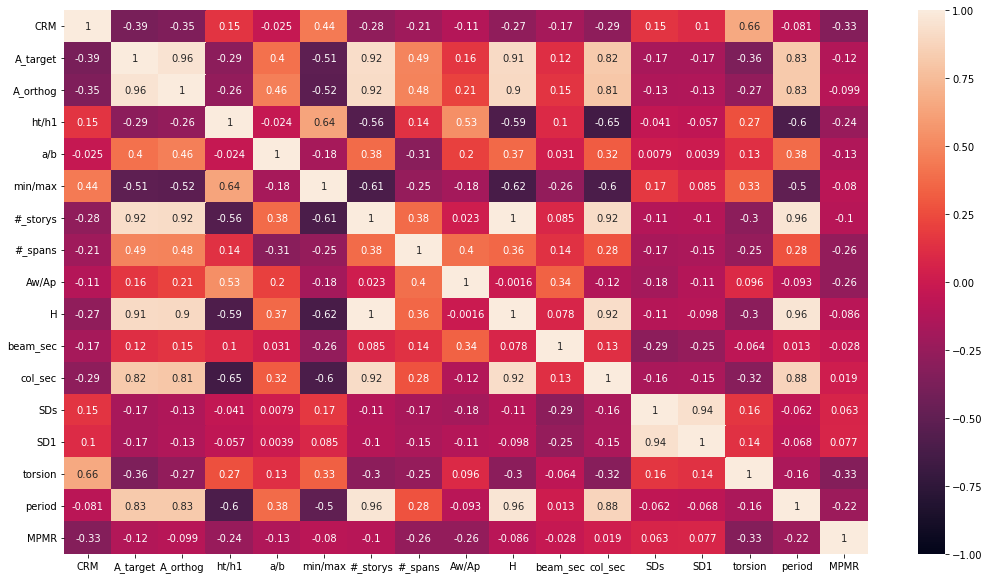

In [18]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False)     #correlation matrix
#cmap="YlGnBu"   Use a different colormap:

#from yellowbrick.regressor import PredictionError, ResidualPlots
#visualizor = PredictionError(lr_model).fit(X_train_scaled, y_train)
#visualizor.score(X_test_scaled, y_test)
#visualizor.poof

Text(5.7, -50, '$\\overline {x}$ = 7.3 \ns = 0.4')

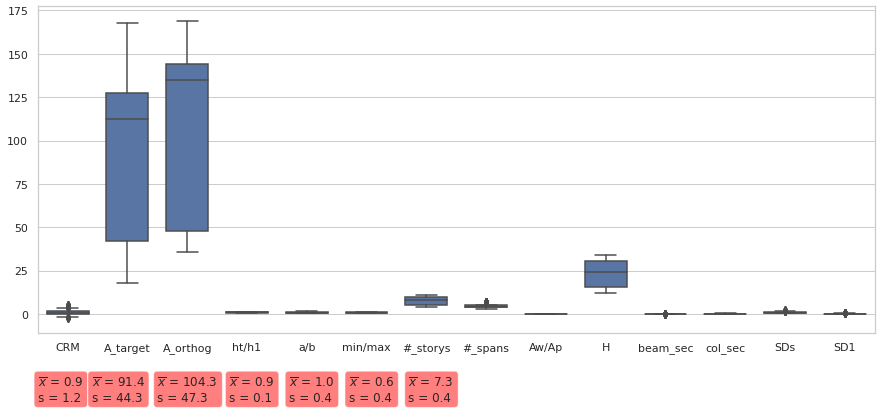

In [19]:
import matplotlib.pyplot as plt
sns.set(style='whitegrid')
fig, ax =plt.subplots(figsize=(15,6))
g=sns.boxplot(data=x, color='b', width=0.7, notch=False)
plt.xticks(np.arange(X_train.shape[1]))
sns.despine(top=False,
            right=False,
            left=False,
            bottom=False)

#mean and standard deviation of all features
mean = round(x['CRM'].mean(),1)
sd = round(x['CRM'].std(),1)
textstr = "$\overline {x}$" + f" = {mean} \ns = {sd}"
props =dict(boxstyle='round', facecolor='red', alpha=0.5)
g.text(-0.5, -50, textstr, fontsize=12, bbox=props)

mean = round(x['A_target'].mean(),1)
sd = round(x['A_target'].std(),1)
textstr = "$\overline {x}$" + f" = {mean} \ns = {sd}"
props =dict(boxstyle='round', facecolor='red', alpha=0.5)
g.text(0.4, -50, textstr, fontsize=12, bbox=props)

mean = round(x['A_orthog'].mean(),1)
sd = round(x['A_orthog'].std(),1)
textstr = "$\overline {x}$" + f" = {mean} \ns = {sd}"
props =dict(boxstyle='round', facecolor='red', alpha=0.5)
g.text(1.5, -50, textstr, fontsize=12, bbox=props)

mean = round(x['ht/h1'].mean(),1)
sd = round(x['ht/h1'].std(),1)
textstr = "$\overline {x}$" + f" = {mean} \ns = {sd}"
props =dict(boxstyle='round', facecolor='red', alpha=0.5)
g.text(2.7, -50, textstr, fontsize=12, bbox=props)

mean = round(x['a/b'].mean(),1)
sd = round(x['a/b'].std(),1)
textstr = "$\overline {x}$" + f" = {mean} \ns = {sd}"
props =dict(boxstyle='round', facecolor='red', alpha=0.5)
g.text(3.7, -50, textstr, fontsize=12, bbox=props)

mean = round(x['min/max'].mean(),1)
sd = round(x['a/b'].std(),1)
textstr = "$\overline {x}$" + f" = {mean} \ns = {sd}"
props =dict(boxstyle='round', facecolor='red', alpha=0.5)
g.text(4.7, -50, textstr, fontsize=12, bbox=props)

mean = round(x['#_storys'].mean(),1)
sd = round(x['a/b'].std(),1)
textstr = "$\overline {x}$" + f" = {mean} \ns = {sd}"
props =dict(boxstyle='round', facecolor='red', alpha=0.5)
g.text(5.7, -50, textstr, fontsize=12, bbox=props)

Text(20, -4, '$\\overline {x}$ = -0.46 \ns = 1.01')

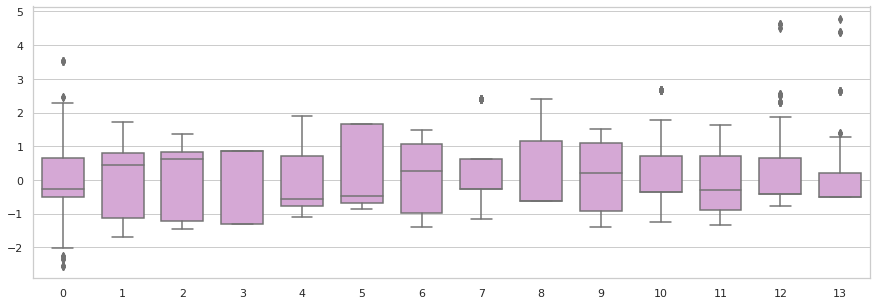

In [20]:
#boxplot of scaled data
sns.set(style='whitegrid')
fig, ax =plt.subplots(figsize=(15,5))
sns.boxplot(data=X_scaled, color='plum', width=0.7, notch=False)
plt.xticks(np.arange(X_scaled.shape[1]))
sns.despine(top=False,
            right=False,
            left=False,
            bottom=False)

#mean and standard deviation of all features
mean = round(X_scaled[0].mean(),2)
sd = round(X_scaled[0].std(),2)
textstr = "$\overline {x}$" + f" = {mean} \ns = {sd}"
props =dict(boxstyle='round', facecolor='red', alpha=0.5)
g.text(20, -4, textstr, fontsize=12, bbox=props)

In [21]:
mean
sd 

1.01

Mean squared error using decision tree:  0.0011668854679450268
Mean absolute error using decision tree:  0.01458737348005793
R2 using decision tree:  0.9429945375739902


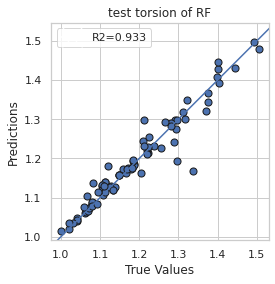

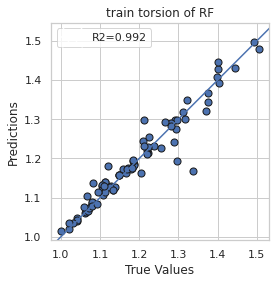

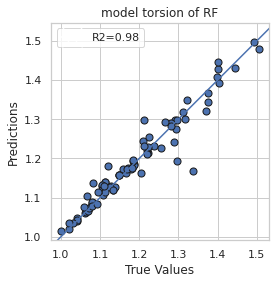

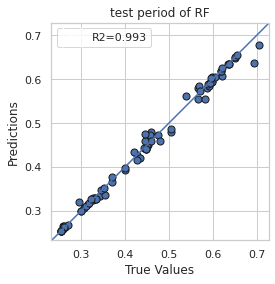

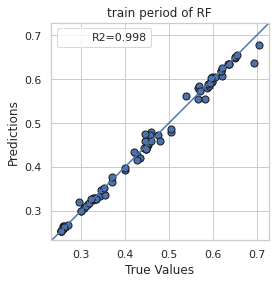

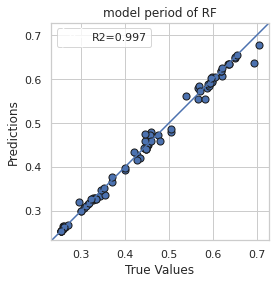

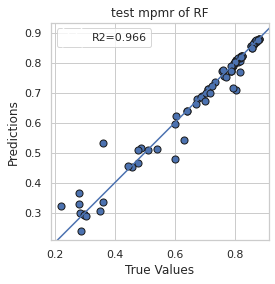

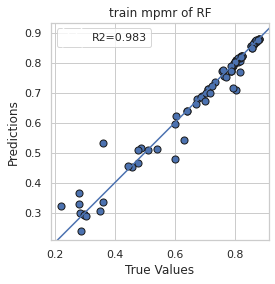

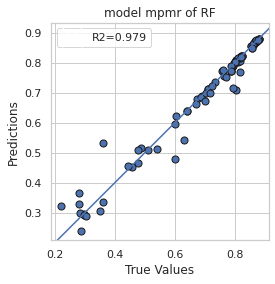

Mean squared error using Random Forest:  0.0007491113503268358
Mean absolute error Using Random Forest:  0.013522288824373882
R2 Using Random Forest:  0.9635983205977294


In [22]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

############################################################
### Decision tree
tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_scaled, y_train)
y_pred_tree_test = tree.predict(X_test_scaled)
y_pred_tree_train = tree.predict(X_train_scaled)

mse_dt = mean_squared_error(y_test, y_pred_tree_test)
mae_dt = mean_absolute_error(y_test, y_pred_tree_test)
r2_tree = r2_score(y_test, y_pred_tree_test)

print('Mean squared error using decision tree: ', mse_dt)
print('Mean absolute error using decision tree: ', mae_dt)
print('R2 using decision tree: ', r2_tree)
# Plot the results

##############################################
#Random forest.
#Increase number of tress and see the effect
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 100, random_state=30)
model.fit(X_train_scaled, y_train)
model.score
y_pred_RF = model.predict(X_test_scaled)
y_pred_RF2 = model.predict(X_train_scaled)
y_pred_RF3 = model.predict(X_scaled)


model.score(X_test_scaled,y_test)   # R2 (coeffiecent of determination)

r2_tor_test_RF = str(round(r2_score(np.array(y_test).T[0], np.array(y_pred_RF).T[0]), 3))
r2_tor_train_RF = str(round(r2_score(np.array(y_train).T[0], np.array(y_pred_RF2).T[0]), 3))
r2_tor_model_RF = str(round(r2_score(np.array(y).T[0], np.array(y_pred_RF3).T[0]), 3))
r2_per_test_RF = str(round(r2_score(np.array(y_test).T[1], np.array(y_pred_RF).T[1]), 3))
r2_per_train_RF = str(round(r2_score(np.array(y_train).T[1], np.array(y_pred_RF2).T[1]), 3))
r2_per_model_RF = str(round(r2_score(np.array(y).T[1], np.array(y_pred_RF3).T[1]), 3))
r2_mpmr_test_RF = str(round(r2_score(np.array(y_test).T[2], np.array(y_pred_RF).T[2]), 3))
r2_mpmr_train_RF = str(round(r2_score(np.array(y_train).T[2], np.array(y_pred_RF2).T[2]), 3))
r2_mpmr_model_RF = str(round(r2_score(np.array(y).T[2], np.array(y_pred_RF3).T[2]), 3))

#plt.scatter(y_test, y_pred_RF)
plot_diff(np.array(y_test).T[0], np.array(y_pred_RF).T[0],r2_tor_test_RF, title='test torsion of RF')
plot_diff(np.array(y_test).T[0], np.array(y_pred_RF).T[0],r2_tor_train_RF, title='train torsion of RF')
plot_diff(np.array(y_test).T[0], np.array(y_pred_RF).T[0],r2_tor_model_RF, title='model torsion of RF')

plot_diff(np.array(y_test).T[1], np.array(y_pred_RF).T[1],r2_per_test_RF, title='test period of RF')
plot_diff(np.array(y_test).T[1], np.array(y_pred_RF).T[1],r2_per_train_RF, title='train period of RF')
plot_diff(np.array(y_test).T[1], np.array(y_pred_RF).T[1],r2_per_model_RF, title='model period of RF')

plot_diff(np.array(y_test).T[2], np.array(y_pred_RF).T[2],r2_mpmr_test_RF, title='test mpmr of RF')
plot_diff(np.array(y_test).T[2], np.array(y_pred_RF).T[2],r2_mpmr_train_RF, title='train mpmr of RF')
plot_diff(np.array(y_test).T[2], np.array(y_pred_RF).T[2],r2_mpmr_model_RF, title='model mpmr of RF')

mse_RF = mean_squared_error(y_test, y_pred_RF)
mae_RF = mean_absolute_error(y_test, y_pred_RF)
r2_RF = r2_score(y_test, y_pred_RF)

print('Mean squared error using Random Forest: ', mse_RF)
print('Mean absolute error Using Random Forest: ', mae_RF)
print('R2 Using Random Forest: ', r2_RF)




In [23]:
#decision Tree Regression with AdaBoost
from sklearn.ensemble import AdaBoostRegressor
AdaBoost_reg = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=rng)

AdaBoost_reg.fit(np.array(X_train_scaled), np.array(y_train)[:,0])

y_pred_adaboost = AdaBoost_reg.predict(X_test_scaled)
y_pred_adaboost2 = AdaBoost_reg.predict(X_train_scaled)
y_pred_adaboost3 = AdaBoost_reg.predict(X_scaled)

r2_tor_test_ada = str(round(r2_score(np.array(y_test).T[0], np.array(y_pred_adaboost)), 3))
r2_tor_train_ada = str(round(r2_score(np.array(y_train).T[0], np.array(y_pred_adaboost2)), 3))
r2_tor_model_ada = str(round(r2_score(np.array(y).T[0], np.array(y_pred_adaboost3)), 3))

#plotting the torsion results
plot_diff(np.array(y_test).T[0], np.array(y_pred_adaboost), r2_tor_test_ada, title='torsion of test data')
plot_diff(np.array(y_train).T[0], np.array(y_pred_adaboost2), r2_tor_train_ada, title='torsion of train data')
plot_diff(np.array(y).T[0], np.array(y_pred_adaboost3), r2_tor_model_ada, title='torsion of all data')


NameError: ignored

In [ ]:
X_test

In [ ]:
#Feature ranking...
feature_list = list(x.columns)
feature_imp = pd.Series(model.feature_importances_, index=feature_list).sort_values(ascending=True)
print(feature_imp)

In [ ]:
from sklearn.tree import DecisionTreeRegressor


# **Regression losses**


1.  MeanSquaredError class
2. MeanAbsoluteError class
3. MeanAbsolutePercentageError class
4. MeanSquaredLogarithmicError class
5. CosineSimilarity class
6. mean_squared_error function
7. mean_absolute_error function
8. mean_absolute_percentage_error function
9. mean_squared_logarithmic_error function
10. cosine_similarity function
11. Huber class
12. huber function
13. LogCosh class
14. log_cosh function


---
#**Regression metrics**
1. MeanSquaredError class
2. RootMeanSquaredError class
3. MeanAbsoluteError class
4. MeanAbsolutePercentageError class
5. MeanSquaredLogarithmicError class
6. CosineSimilarity class
7. LogCoshError class

#**Available optimizers**
1. SGD
2. RMSprop
3. Adam
4. Adadelta
5. Adagrad
6. Adamax
7. Nadam
8. Ftrl

In [ ]:
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
y_predict1 = MultiOutputRegressor(GradientBoostingRegressor(random_state=0)).fit(np.array(X_train), np.array(y_train)).predict(np.array(X_test_scaled))


print(y_predict1.shape)
print(X_test_scaled.shape)

In [ ]:
X_test_scaled.shape